# LetsGrowMore #MAY2023
# Author - Balaji Bathini

Task-1: Stock Market Prediction And Forecasting Using Stacked LSTM

Level : Beginner

Language-Python

Software-  VS code

Dataset-:https://www.kaggle.com/datasets/akshaydattatraykhare/nsetataglobal |


 https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv


Importing Libraries

In [40]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


import seaborn as sns

Importing Data Set

In [ ]:
data = pd.read_csv('NSE-TATAGLOBAL11.csv')
     

To test whether the dataset has loaded properly in Jupyter Notebook

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


Checking datatypes in dataset 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


Checking the number of rows and columns

In [ ]:
data.shape

(1235, 8)

Describing the dataset

In [ ]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


Checking for null values in the dataset

In [ ]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Sorting the Data

In [ ]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


Data Visualization

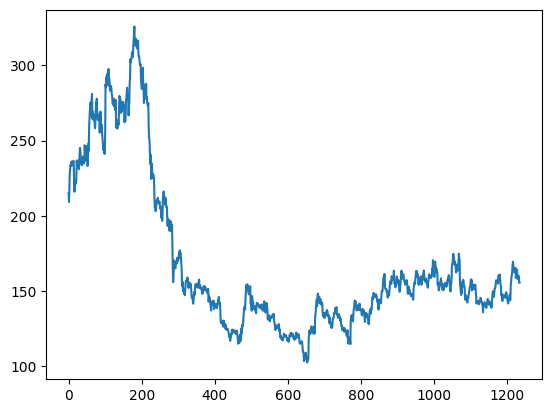

In [ ]:
plt.plot(df['Close']) 

In [ ]:
dff=df['Close']
dff

1234    155.80
1233    155.55
1232    160.15
1231    160.05
1230    159.45
         ...  
4       230.90
3       227.60
2       218.20
1       209.20
0       215.15
Name: Close, Length: 1235, dtype: float64

Min Max Scaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
dff

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

Spliting the Dataset

In [ ]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

Converting an Array of values into a Dataset matrix

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

Spliting the Data into Train and Test

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(763, 100)
(763,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(270, 100)
(270,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

Creating the stacked LSTM Model

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
11/11 [==============================] - 9s 333ms/step - loss: 0.0091 - val_loss: 0.0023
Epoch 2/60
11/11 [==============================] - 2s 207ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 3/60
11/11 [==============================] - 3s 240ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 4/60
11/11 [==============================] - 2s 214ms/step - loss: 0.0016 - val_loss: 6.1448e-04
Epoch 5/60
11/11 [==============================] - 5s 494ms/step - loss: 0.0012 - val_loss: 5.1841e-04
Epoch 6/60
11/11 [==============================] - 3s 218ms/step - loss: 0.0011 - val_loss: 8.0986e-04
Epoch 7/60
11/11 [==============================] - 2s 207ms/step - loss: 0.0011 - val_loss: 8.7122e-04
Epoch 8/60
11/11 [==============================] - 2s 207ms/step - loss: 0.0010 - val_loss: 8.7353e-04
Epoch 9/60
11/11 [==============================] - 2s 207ms/step - loss: 0.0010 - val_loss: 7.9229e-04
Epoch 10/60
11/11 [==============================] - 2s 208ms/step - loss: 9

In [54]:
data_testing_complete = pd.read_csv('NSE-TATAGLOBAL11.csv')
data_testing_processed = data_testing_complete.iloc[:, 1:2]
data_testing_processed

,Open
0,208.00
1,217.00
2,223.50
3,230.00
4,234.55
...,...
1230,160.85
1231,161.15
1232,156.00
1233,155.70


Prediction of the Data

In [64]:
# Reshape the input data to have two dimensions
X_train_reshaped = X_train.reshape(-1, 1)

# Fit the scaler on the reshaped training data
scaler = MinMaxScaler()
scaler.fit(X_train_reshaped)

# Transform the test data using the fitted scaler
test_inputs_reshaped = test_inputs.reshape(-1, 1)
test_inputs_scaled = scaler.transform(test_inputs_reshaped)

# Perform predictions on the test data
test_predict = model.predict(X_test)

# Inverse transform the predicted values
test_predicted = scaler.inverse_transform(test_predict)

test_predicted

9/9 [==============================] - 0s 41ms/step


array([[0.12496723],
       [0.1257442 ],
       [0.12925375],
       [0.13401322],
       [0.1384083 ],
       [0.14195482],
       [0.1449241 ],
       [0.14518386],
       [0.14507967],
       [0.14465559],
       [0.14511873],
       [0.14716657],
       [0.14880872],
       [0.14899746],
       [0.14440987],
       [0.13656457],
       [0.13223904],
       [0.13009936],
       [0.13114344],
       [0.13483474],
       [0.13926038],
       [0.14217268],
       [0.1446456 ],
       [0.14640114],
       [0.14671028],
       [0.1459772 ],
       [0.1451869 ],
       [0.14558145],
       [0.146077  ],
       [0.14608811],
       [0.1460063 ],
       [0.14478071],
       [0.14238684],
       [0.13955049],
       [0.13966914],
       [0.14045759],
       [0.1426172 ],
       [0.14879212],
       [0.15813214],
       [0.16646957],
       [0.17138785],
       [0.17194484],
       [0.16930047],
       [0.16926673],
       [0.1677974 ],
       [0.16521432],
       [0.16896994],
       [0.174

Ploting Results

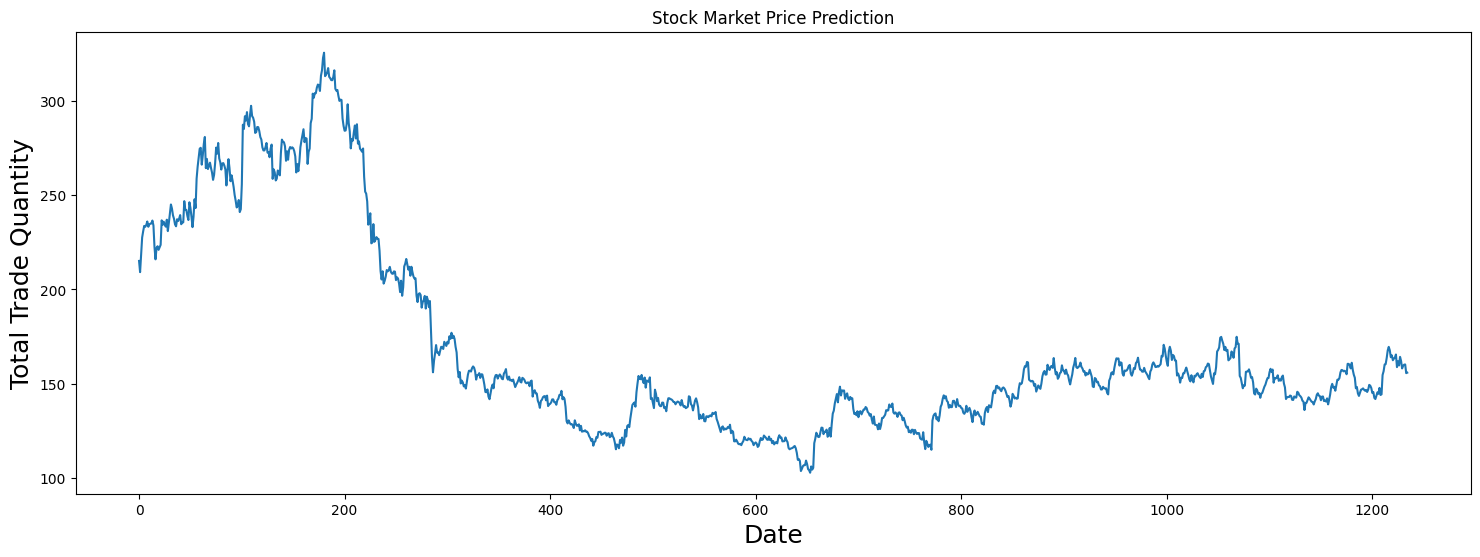

In [65]:
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Prediction")
plt.plot(data_testing_complete['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()


Analyze the Closing price from the dataframe

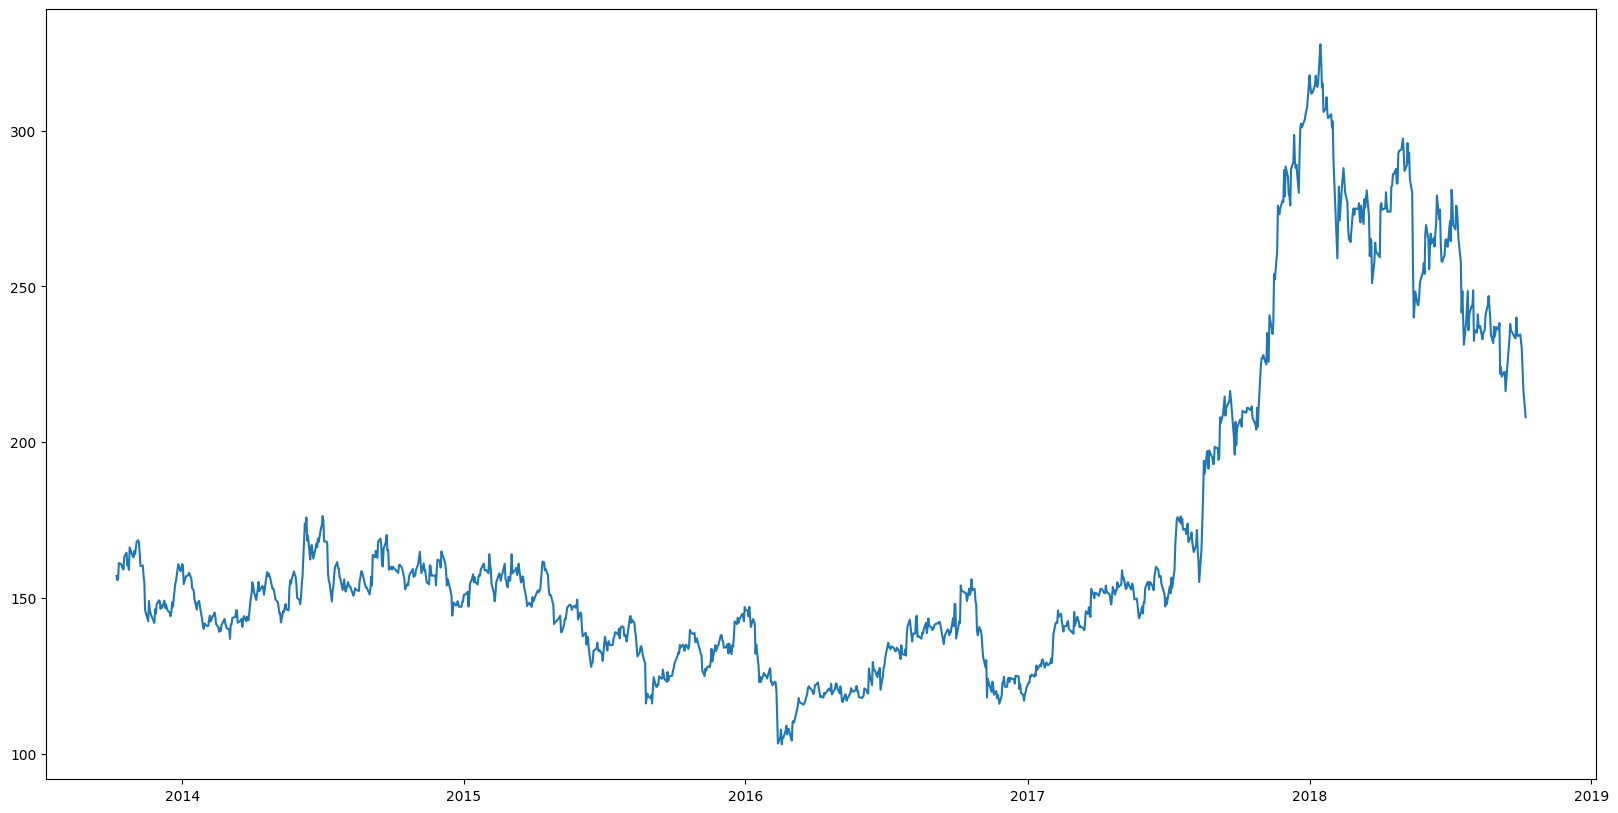

In [66]:

data["Date"] = pd.to_datetime(data.Date)
data.index = data['Date']

plt.figure(figsize=(20, 10))
plt.plot(data["Open"], label='ClosePriceHist')

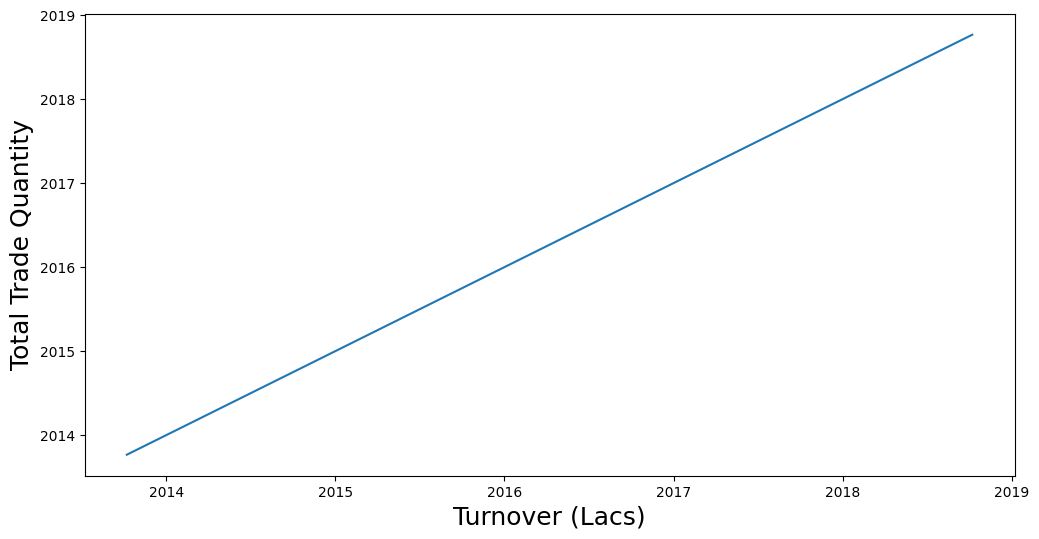

In [67]:

plt.figure(figsize=(12,6))
plt.plot(data['Date'])
plt.xlabel('Turnover (Lacs)', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

Analyze the Closing price from the dataframe

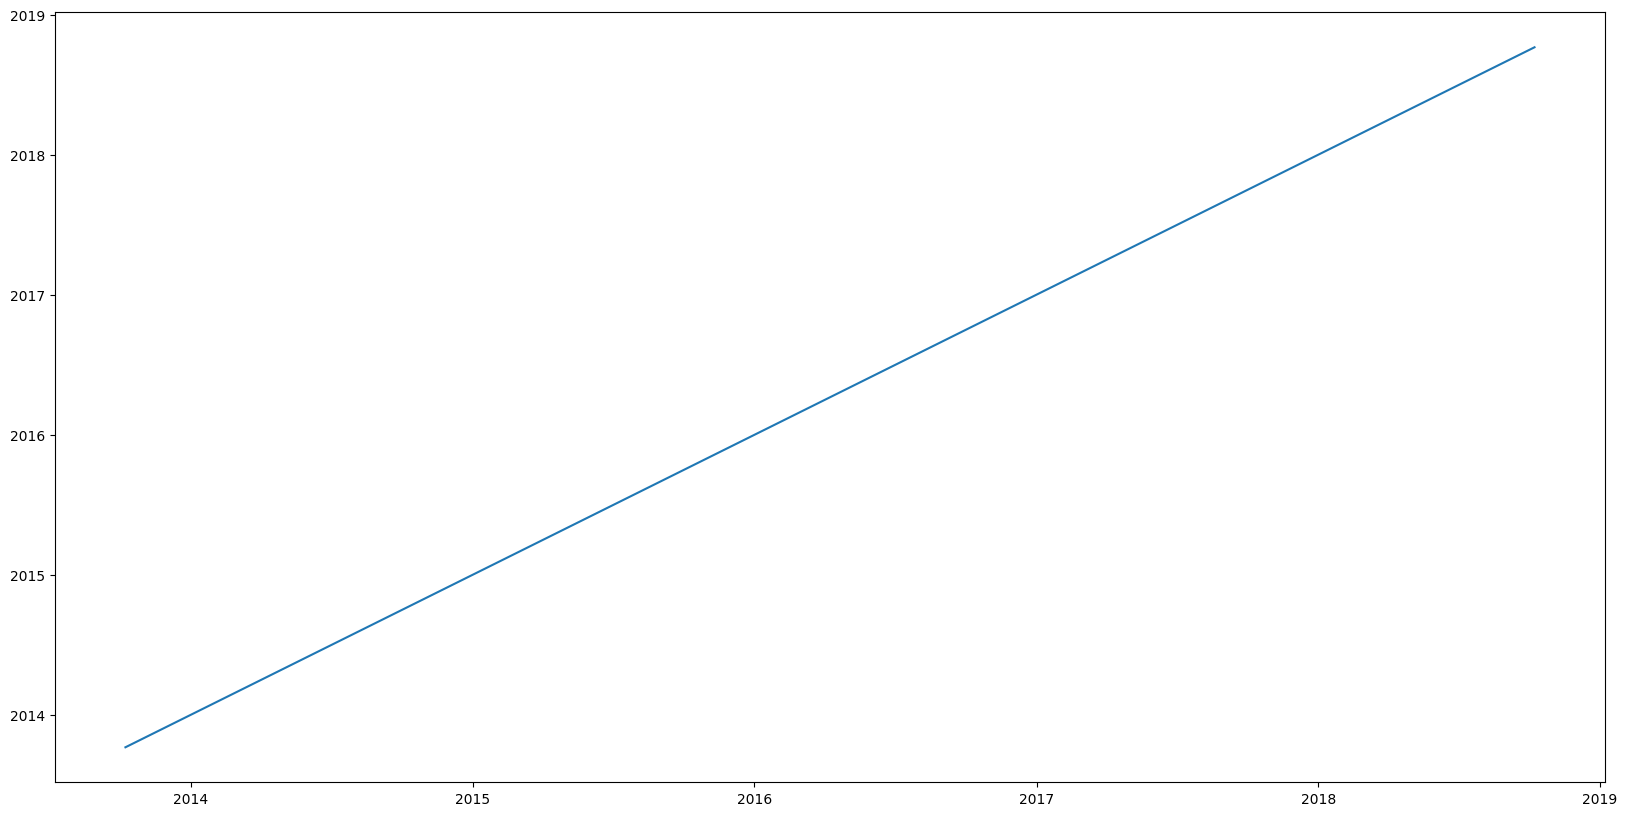

In [68]:
data["Turnover (Lacs)"] = pd.to_datetime(data.Date)
data.index = data['Turnover (Lacs)']

plt.figure(figsize=(20, 10))
plt.plot(data["Turnover (Lacs)"], label='ClosePriceHist')

<Axes: xlabel='Turnover (Lacs)'>

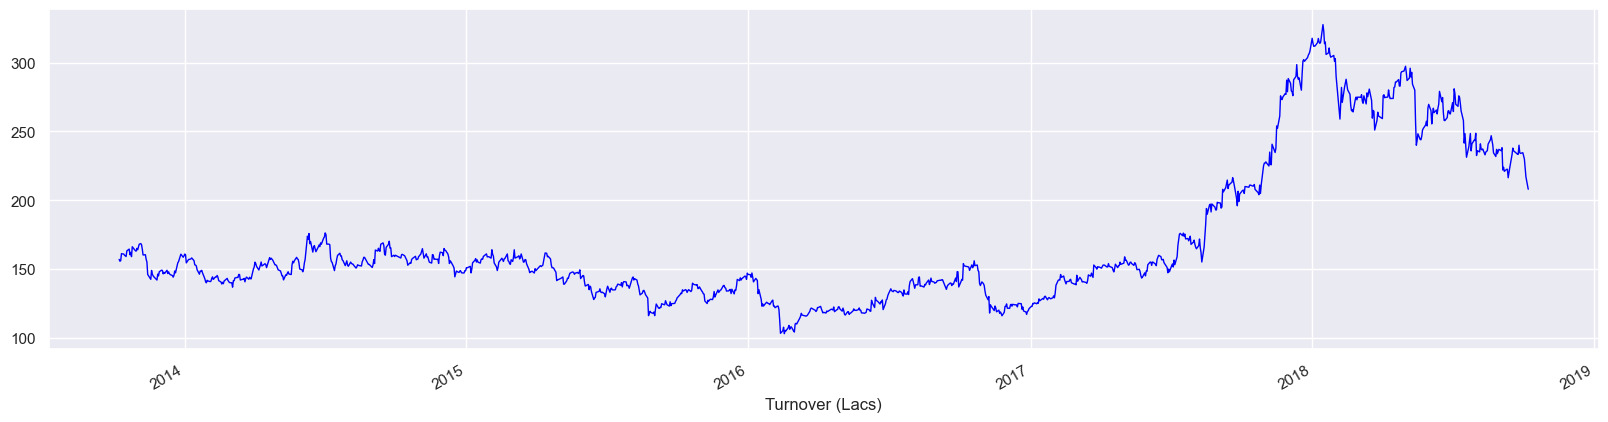

In [69]:
sns.set(rc = {'figure.figsize': (20, 5)})
data['Open'].plot(linewidth = 1,color='blue')

In [70]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [73]:
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


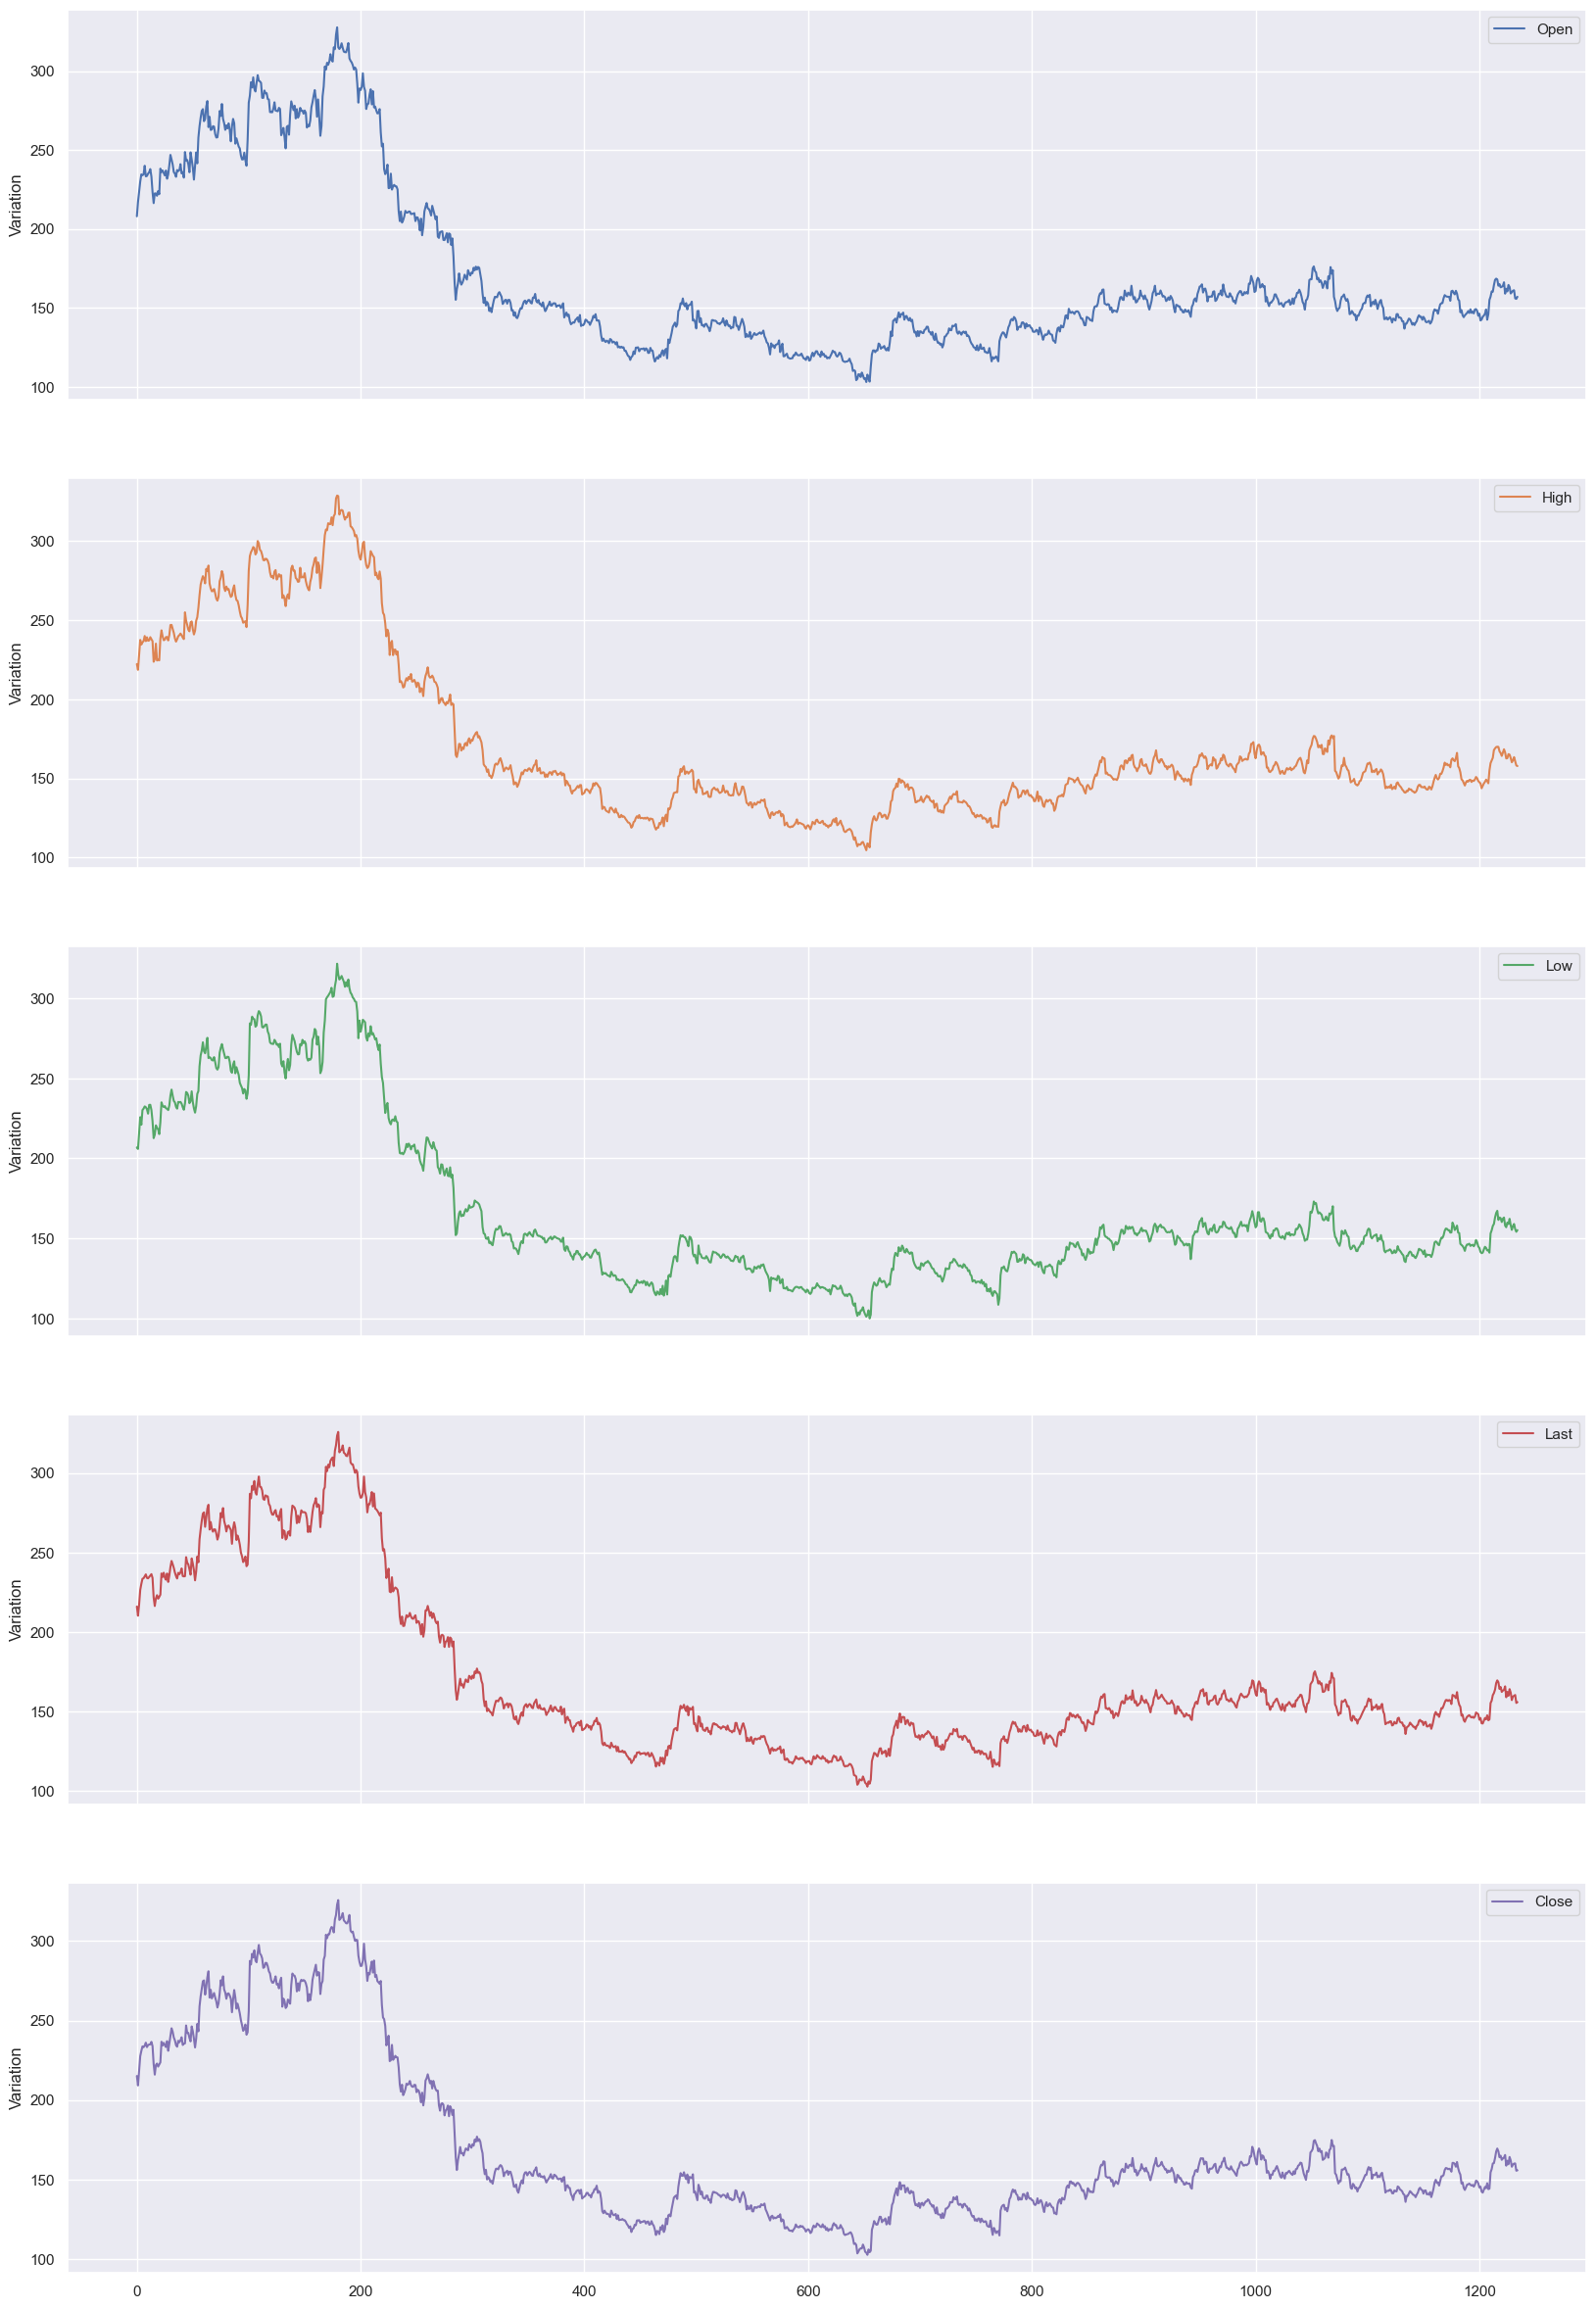

In [74]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

Calculating the Performance

In [75]:
import math
from sklearn.metrics import mean_squared_error
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.059959781142096095

# Conclusion:

The Stock Market Prediction and Forecasting using Stacked LSTM is a technique used to predict and forecast stock market prices based on historical data. The Stacked LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) architecture that is well-suited for sequence prediction tasks.